In this algorithm price movements are discritized by standard deviation and we get much more detailed signal encoding than in binary case

[*********************100%***********************]  1 of 1 completed


/opt/anaconda3/lib/python3.8/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


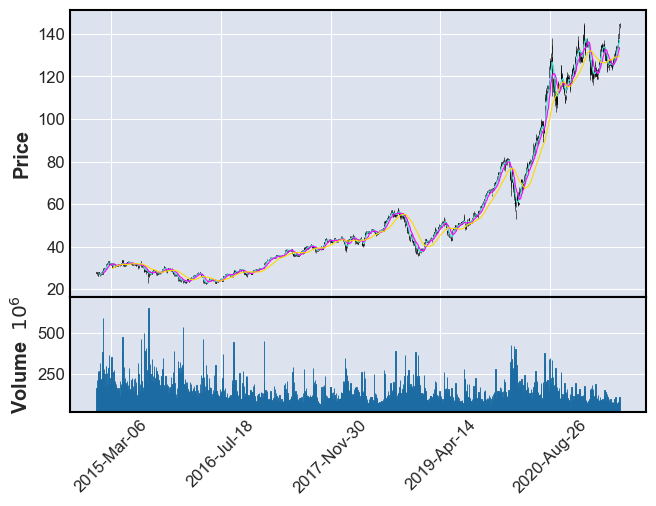

<bound method NDFrame.describe of                  Close
Date                  
2014-12-31   27.594999
2015-01-02   27.332500
2015-01-05   26.562500
2015-01-06   26.565001
2015-01-07   26.937500
...                ...
2021-06-30  136.960007
2021-07-01  137.270004
2021-07-02  139.960007
2021-07-06  142.020004
2021-07-07  144.570007

[1640 rows x 1 columns]>

In [20]:
import numpy as np
import pandas as pd
from datetime import datetime 
import yfinance as yf
import mplfinance as mpf
start_date = datetime (2015, 1, 1)
end_date = datetime(2021, 7, 8)
df = yf.download('AAPL', start=start_date, end=end_date)
mpf.plot(df, type='candle',mav=(10,20,50),volume=True, show_nontrading=True)
close = df["Close"]
close = pd.DataFrame(data= close)
close.describe

In [21]:
daily_returns = close.pct_change()
sd = daily_returns.describe(include='all').loc['std']
mu = daily_returns.describe(include='all').loc['mean']
minv = daily_returns.describe(include='all').loc['min']
maxv = daily_returns.describe(include='all').loc['max']

daily_returns.describe(include='all')

,Close
count,1639.000000
mean,0.001184
std,0.018571
min,-0.128647
25%,-0.006886
50%,0.000893
75%,0.010185
max,0.119808


In [22]:
dr= daily_returns 
dr= dr.iloc[1: , :]  
dr

,Close
Date,
2015-01-02,-0.009513
2015-01-05,-0.028172
2015-01-06,0.000094
2015-01-07,0.014022
2015-01-08,0.038422
...,...
2021-06-30,0.004621
2021-07-01,0.002263
2021-07-02,0.019596


In [23]:
minv,maxv
sd = float(sd)
minv = float(minv)
maxv = float(maxv)
sd,minv,maxv

(0.018571169568094213, -0.12864695596573805, 0.11980826654731591)

In [24]:
#how many groups to form
numbceil= (maxv-minv)/sd
numbceil

13.378544716963168

In [25]:
minv+1*sd

-0.11007578639764384

In [26]:
minv+2*sd

-0.09150461682954963

In [27]:
minv+3*sd

-0.07293344726145541

In [28]:
# sigma encoding



def assign_label(i):
   
    if i >= minv and i < minv +sd:
        return '0'
    
    if i >=minv +sd and i < minv +2*sd:
        return '1'
    if i >= minv +2*sd and i < minv +3*sd:
        return '2'
    if i >= minv+3*sd and i < minv +4*sd:
        return '3'
    
    if i >=minv +4*sd and i < minv +5*sd:
        return '4'
    if i >= minv +5*sd and i < minv +6*sd:
        return '5'
    if i >= minv +6*sd and i < minv +7*sd:
        return '6'
    if i >= minv +7*sd and i < minv +8*sd:
        return '7'
    if i >= minv +8*sd and i < minv +9*sd:
        return '8'
    if i >= minv +9*sd and i < maxv:
        return '9'
dr['Labels'] = dr['Close'].apply(assign_label)

print(dr['Labels'])

dr


Date
2015-01-02    6
2015-01-05    5
2015-01-06    6
2015-01-07    7
2015-01-08    8
             ..
2021-06-30    7
2021-07-01    7
2021-07-02    7
2021-07-06    7
2021-07-07    7
Name: Labels, Length: 1639, dtype: object


<ipython-input-28-354933b1f35b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr['Labels'] = dr['Close'].apply(assign_label)


,Close,Labels
Date,,
2015-01-02,-0.009513,6
2015-01-05,-0.028172,5
2015-01-06,0.000094,6
2015-01-07,0.014022,7
2015-01-08,0.038422,8
...,...,...
2021-06-30,0.004621,7
2021-07-01,0.002263,7
2021-07-02,0.019596,7


In [29]:
dr1 = dr.Labels.value_counts()
dr1

6    663
7    625
5    147
8    127
9     37
4     25
3      9
1      2
2      2
0      1
Name: Labels, dtype: int64

In [30]:
import time,numpy as np
#----------------------------------------------
def plugIn(msg,w):
    # Cumpute plug-in (ML) entropy rate
    pmf=pmf1(msg,w)
    out=-sum([pmf[i]*np.log2(pmf[i]) for i in pmf])/w
    return out, pmf


#----------------------------------
def pmf1(msg,w):
    # Compute the prob mass function for a one dim discrete rv
    # len(msg) -w occurrences
    lib={}
    if not isinstance(msg,str):msg=''.join(map(str,msg))
    for i in range(w,len(msg)):
        msg_=msg[i-w:i]
        if msg_ not in lib:lib[msg_]=[i-w]
        else:lib[msg_]=lib[msg_]+[i-w]
    pmf=float(len(msg)-w)
    pmf={i:len(lib[i])/pmf for i in lib}
    return pmf

In [31]:
ent_sig = plugIn(dr['Labels'], w= 6)

In [32]:
ent_sig

(1.5469897198996867,
 {'656786': 0.0006112469437652812,
  '567865': 0.0006112469437652812,
  '678657': 0.0012224938875305623,
  '786576': 0.0012224938875305623,
  '865765': 0.0006112469437652812,
  '657656': 0.0006112469437652812,
  '576568': 0.0006112469437652812,
  '765687': 0.0006112469437652812,
  '656878': 0.0006112469437652812,
  '568787': 0.0006112469437652812,
  '687876': 0.0006112469437652812,
  '878765': 0.0012224938875305623,
  '787659': 0.0006112469437652812,
  '876598': 0.0006112469437652812,
  '765986': 0.0006112469437652812,
  '659867': 0.0006112469437652812,
  '598676': 0.0006112469437652812,
  '986767': 0.0006112469437652812,
  '867677': 0.0012224938875305623,
  '676776': 0.007946210268948655,
  '767767': 0.003667481662591687,
  '677677': 0.003667481662591687,
  '776778': 0.0018337408312958435,
  '767787': 0.0012224938875305623,
  '677877': 0.0012224938875305623,
  '778777': 0.0012224938875305623,
  '787777': 0.0012224938875305623,
  '877776': 0.0006112469437652812,
  

In [33]:
def lempelZiv_lib(msg):
    i,lib=1,[msg[0]]
    while i<len(msg):
        for j in range(i,len(msg)):
            msg_=msg[i:j+1].all
            if msg_ not in lib:
                lib.append(msg_)
                break
        i=j+1
    return lib

In [34]:
msg = dr['Labels']
lz=lempelZiv_lib(msg)
lz

['6',
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2015-01-05    5
 Name: Labels, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2015-01-06    6
 Name: Labels, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2015-01-07    7
 Name: Labels, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2015-01-08    8
 Name: Labels, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2015-01-09    6
 Name: Labels, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2015-01-12    5
 Name: Labels, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2015-01-13    7
 Name: Labels, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2015-01-14    6
 Name: Labels, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Dat

In [ ]:
import numpy as np

def matchLength(msg,i,n):
    #Maximum matched length +1, with overlap
    # i>=n & len(msg)>=i+n
    subS=''
    for l in range(n):
        msg1=msg[i:i+l+1]
        for j in range(i-n,i):
            msg0=msg[j:j+l+1]
            if msg1==msg0:
                subS=msg1
                break # search for higher 1
    return len(subS)+1,subS # matched length+1
#---------------------------------------
#---------------------------------------
def konto(msg,window=None):
    '''
*Kontoyiannis' LZ entropy estimate, 2013 version (centered window)
*Inverse of the avg length of the shortest non redundant substring
*if non-redundant substrings are short, the text is highly entropic
*window==None for expanding window, in which case len(msg)%2==0
*if the end of msg is more relevant, try konto(msg[::-1])
'''
    out={'num':0,'sum':0,'subS':[]}
    if not isinstance(msg,str):msg=''.join(map(str,msg))
    if window is None:
        points=range(1,int(len(msg)/2)+1)
    else:
        window=min(window,len(msg)/2)
        points=range(window,len(msg)-window+1)
    for i in points:
        if window is None:
            l,msg_=matchLength(msg,i,i)
            out['sum']+=np.log2(i+1)/l# to aviod doeblin condition
        else:
            l,msg_=matchLength(msg,i,window)
            out['sum']+=np.log2(window+1)/l# to avoid Doeblin condition
        out['subS'].append(msg_)
        out['num']+=1
    out['h']=out['sum']/out['num']
    out['r']=1-out['h']/np.log2(len(msg))# redundancy, 0<=r<=1
    return out

#--------------------------------------
if __name__=='__main__':
    msg=dr['Labels']
    print(konto(msg*2))
    print(konto(msg+msg[::-1]))

{'num': 1639, 'sum': 1722.3924793441224, 'subS': ['6', '', '5', '66', '6', '', '7', '', '8', '6655', '655', '55', '5', '77', '7', '665566', '65566', '5566', '566', '66', '6', '88', '8', '7788', '788', '8877', '877', '776655', '76655', '6655', '655', '55', '5', '', '9', '8866', '866', '6677', '677', '7766', '766', '6677', '677', '77', '777', '77667777', '7667777', '667777', '67777', '7777', '777', '778877', '78877', '8877', '877', '7777', '7777777', '777777', '77777', '77776677', '7776677', '776677', '76677', '66778866557766', '6778866557766', '778866557766', '78866557766', '8866557766', '866557766', '66557766', '6557766', '557766', '57766', '7766777766', '766777766', '66777766', '6777766', '777766', '77766', '7766', '766', '66', '666', '667777', '67777', '7777', '777', '77', '7', '55', '555', '5577667777', '577667777', '77667777', '7667777', '667777', '67777', '77777766', '7777766', '7777666677', '777666677', '77666677', '7666677', '666677', '66677', '667766', '67766', '776655', '76655